# Comparison between the extrapolate temperatures of infinite and finite all eigvals


In [2]:
import sys
sys.path.append('C:\\Users\\MHJGuillermo\\PycharmProjects\\Doctorado\\Ising\\isingchat\\src')

In [3]:
%pylab inline

from pathlib import Path

import h5py
import numpy as np
from isingchat import style
from isingchat.io import read_ising_config
from matplotlib import pyplot, rcParams
from matplotlib.axes import Axes, GridSpec
from matplotlib.figure import Figure
from ruamel.yaml import YAML
from scipy import interpolate as interp
from scipy.signal import savgol_filter
import pandas as pd
import json

import os
import re

yaml = YAML()

Populating the interactive namespace from numpy and matplotlib


## get data

In [4]:
# get extrapol temperature for regular infinite-size
data_path = Path("../../data/regular/infinite-size/Extrapolation").resolve()
file = 'inv_Tc_vs_inv_nv_extrapol_hurwitz_2_parms_with_nv_5plus_and_error_v30nv_extrapol_values.csv'
df_infinite_inv_tc = pd.read_csv(os.path.join(data_path,file),index_col=0)
# get temperature for regular infinite
data_path = Path("../../data/regular/finite-size/Extrapolation").resolve()
file = 'finite_inv_Tc_vs_inv_nv_extrapol_gen_zeta_2_parms_with_nv_3plus_with_errors_c_extrapol_values.csv'
df_finite_allEigs = pd.read_csv(os.path.join(data_path,file),index_col=0)

In [5]:
df_infinite_inv_tc

,P1.0,P1.05,P1.1,P1.2,P1.3,P1.4,P1.5,P1.6,P1.7,P1.8,P1.9,P2.0
infty,0.0,0.024186,0.04956,0.102219,0.157607,0.213803,0.271144,0.328581,0.385558,0.441409,0.495609,0.547316
infty_err,0.0,0.001860,0.00428,0.010026,0.017643,0.026235,0.034720,0.042625,0.049728,0.053584,0.051978,0.046973


In [6]:
df_finite_allEigs

,P1.0,P1.05,P1.1,P1.2,P1.3,P1.4,P1.5,P1.6,P1.7,P1.8,P1.9,P2.0
infty,0.0,0.025070,0.051598,0.107653,0.165228,0.222553,0.278805,0.332448,0.383566,0.431521,0.476732,0.518535
infty_err,0.0,0.002671,0.005753,0.013467,0.021220,0.028993,0.037323,0.044893,0.052560,0.066537,0.077265,0.109745


## begin plots

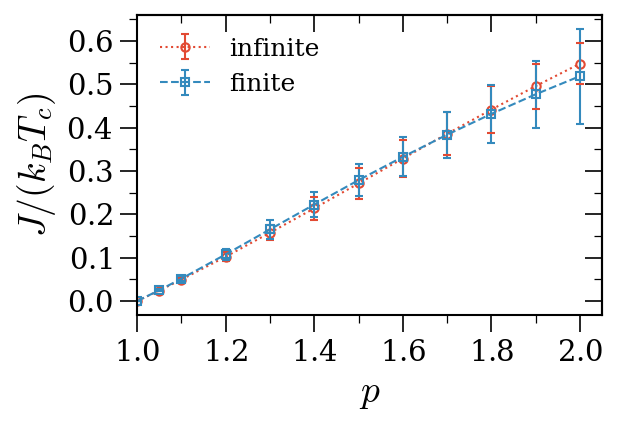

In [7]:
# Load the default style.
style.use("default")
# rcParams["text.usetex"] = False
markers = ["o","v","s","P","p","*","h","D","X","8"]
line_styles = ["solid","dotted","dashed","dashdot",
               (0,(1,1)),(0,(5,1)),(0,(3,1,1,1)),(0,(3,1,1,1,1,1)),(0,(1,10)),(0,(5,10)),(0,(3,10,1,10))]

# fig1: Figure = pyplot.figure(figsize=(12*(4/9), 12), dpi=150)
fig1: Figure = pyplot.figure(figsize=(4, 9), dpi=150)
grid_spec = GridSpec(3, 1)

# Specific heat subplot.
ax: Axes = fig1.add_subplot(grid_spec[0, 0])

# ---- Set plots ---- #

x_data_infinite = df_infinite_inv_tc.columns.map(lambda x: float(x.replace('P',''))).values
y_data_infinite = df_infinite_inv_tc.loc['infty'].values
y_data_infinite_err = df_infinite_inv_tc.loc['infty_err'].values
# x_data_infinite = np.delete(x_data_infinite,1) # clear 1.05
# y_data_infinite = np.delete(y_data_infinite,1) # clear 1.05
# y_data_infinite_err = np.delete(y_data_infinite_err,1) # clear 1.05

x_data_finite_allEigs = df_finite_allEigs.columns.map(lambda x: float(x.replace('P',''))).values
y_data_finite_allEigs = df_finite_allEigs.loc['infty'].values
y_data_finite_err = df_finite_allEigs.loc['infty_err'].values
# x_data_finite_allEigs = np.delete(x_data_finite_allEigs,1) # clear 1.05
# y_data_finite_allEigs = np.delete(y_data_finite_allEigs,1) # clear 1.05
# y_data_finite_err = np.delete(y_data_infinite_err,1) # clear 1.05

# ---------------- #

ax.errorbar(x_data_infinite, y_data_infinite, yerr=y_data_infinite_err, 
            marker=markers[0],
#             capthick="mew",
            capsize=2.0,
            barsabove=True,
            color='C'+str(0),
            mfc='none',
            mew=1,
            lw=1,
            linestyle=line_styles[1],
            label = r"{}".format('infinite')
           )
ax.errorbar(x_data_finite_allEigs, y_data_finite_allEigs, yerr=y_data_finite_err,
            marker=markers[2],
            capsize=2.0,
            color='C'+str(1),
            mfc='none',
            mew=1,
            lw=1,
            linestyle=line_styles[2],
            label = r"{}".format('finite')
           )

# labels configurations
ax.set_xlabel(r"$p$")
ax.set_ylabel(r"$J/(k_BT_c)$")
ax.set_xlim(1, 2.05)

ax.legend(
          loc ="upper left",
          fontsize = 12,
          frameon=False
)


# Set major ticks for x axis
major_xticks = np.arange(1, 2, 0.2)

# I want minor ticks for x axis
minor_xticks = np.arange(1, 2, 0.1)

# Set major ticks for y axis
major_yticks = np.arange(0, 1, 0.1)

# I want minor ticks for y axis
minor_yticks = np.arange(0, 1, 0.05)

# ticks configuration
ax.xaxis.set_major_locator(plt.MultipleLocator(0.2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(0.1))
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(14) 

ax.yaxis.set_major_locator(plt.MultipleLocator(0.1))
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.05))
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14) 


# ticks for the top axes
ax.tick_params(which='both',top=False,right=False)
ax.tick_params(which='minor',size=4)
ax.tick_params(which='major',size=8)
ax2 = ax.secondary_xaxis('top')
ax2.tick_params(which='both',direction='in',labeltop=False)
ax2.set_ticks(major_xticks)
ax2.set_ticks(minor_xticks, minor=True)
ax2.tick_params(which='minor',size=4)
ax2.tick_params(which='major',size=8)

# ticks for the right axes
ax3 = ax.secondary_yaxis('right')
ax3.tick_params(which='both',direction='in',labelright=False)
ax3.set_ticks(major_yticks)
ax3.set_ticks(minor_yticks,minor=True)
ax3.tick_params(which='minor',size=4)
ax3.tick_params(which='major',size=8)

#save plot
# plt.savefig('C://Users//MHJGuillermo//PycharmProjects//Doctorado//Ising//isingchat//graphs//comparisons//regular_Tc_infinite-finiteAllEigs_rev2.pdf')
plt.savefig('C://Users//MHJGuillermo//PycharmProjects//Doctorado//Ising//isingchat//graphs//comparisons//regular_Tc_infinite-finiteAllEigs_rev2.eps')

pyplot.draw()
pyplot.show()

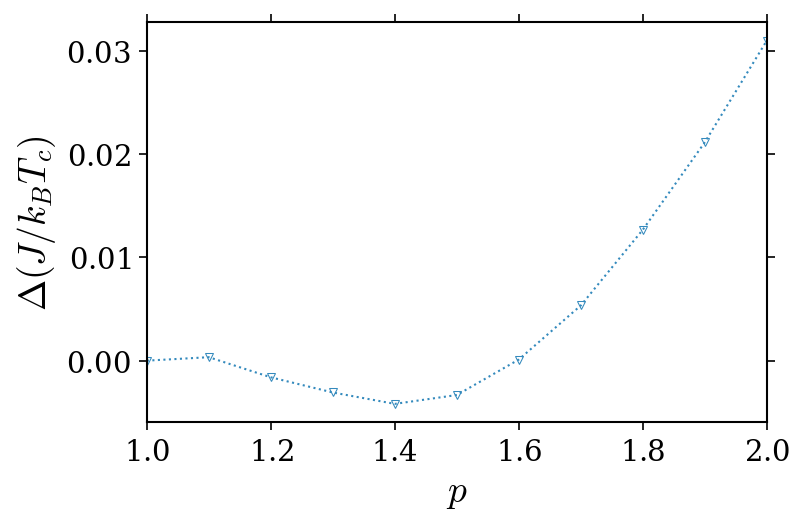

In [15]:
# Diferencia
# Load the default style.
style.use("default")
# rcParams["text.usetex"] = False
markers = ["o","v","s","P","p","*","h","D","X","8"]
line_styles = ["solid","dotted","dashed","dashdot",
               (0,(1,1)),(0,(5,1)),(0,(3,1,1,1)),(0,(3,1,1,1,1,1)),(0,(1,10)),(0,(5,10)),(0,(3,10,1,10))]

# fig1: Figure = pyplot.figure(figsize=(4, 9), dpi=150)
fig1: Figure = pyplot.figure(figsize=(12*(4/9), 12), dpi=150)

grid_spec = GridSpec(3, 1)

# Specific heat subplot.
ax: Axes = fig1.add_subplot(grid_spec[0, 0])


# ---- Set plots ---- #

x_data_infinite = df_infinite_inv_tc.columns.map(lambda x: float(x.replace('P',''))).values
x_data_infinite = np.delete(x_data_infinite,1)
y_data_infinite = df_infinite_inv_tc.loc['infty'].values
y_data_infinite = np.delete(y_data_infinite,1)

x_data_finite_allEigs = df_finite_allEigs.columns.map(lambda x: float(x.replace('P',''))).values
x_data_finite_allEigs = np.delete(x_data_finite_allEigs,1) # clear 1.05
y_data_finite_allEigs = df_finite_allEigs.loc['infty'].values
y_data_finite_allEigs = np.delete(y_data_finite_allEigs,1) # clear 1.05

# ---------------- #

ax.plot(x_data_infinite, y_data_infinite-y_data_finite_allEigs, marker=markers[1],
               color='C'+str(1),
               mfc='none',
               mew=0.5,
               lw=1,
               linestyle=line_styles[1]
           )

# labels configurations
ax.set_xlabel(r"$p$")
ax.set_ylabel(r"$\Delta (J/k_BT_c)$")
ax.set_xlim(1, 2)

pyplot.draw()
pyplot.show()